In [1]:
import random
import pickle

import gym
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_notebook

# Часть 1

## Пункт 1. Смотрим очень простую стратегию

In [2]:
env = gym.make('Blackjack-v0', natural='True')

In [3]:
def first_policy(hand_sum):
    if hand_sum < 19:
        action = 1
    else:
        action = 0
    return action

In [4]:
n_steps = int(1e5)
rewards = []
for _ in tqdm(range(n_steps)):
    player_hand_sum, dealer_card, usable_ace = env.reset()
    done = False
    while not done:
        (player_hand_sum, dealer_card, usable_ace), reward, done, _ = env.step(first_policy(player_hand_sum))
    rewards.append(reward)
print('Средняя награда по примитивной стратегии:', np.mean(rewards))

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:12<00:00, 7834.74it/s]

Средняя награда по примитивной стратегии: -0.17864


## Пункт 2. Пробуем Q-обучение

In [3]:
env = gym.make('Blackjack-v0', natural=True)

In [6]:
print(env.observation_space)
print(env.action_space)

Tuple(Discrete(32), Discrete(11), Discrete(2))
Discrete(2)


Таким образом, Q будет представлять собой матрицу 32х11х2х2

In [2]:
def epsilon_greedy_policy(Q, state, epsilon):
    if random.random() < epsilon:
        return random.choice([0, 1])
    else:
        return np.argmax(Q[state[0], state[1], int(state[2])])

In [4]:
def run_experiment(learning_rate, gamma, epsilon, n_learning_steps=int(5e5), n_playing_steps=int(1e5)):
    env = gym.make('Blackjack-v0', natural=True)
    rewards = []
    Q = np.zeros((32, 11, 2, 2))
    for _ in tqdm_notebook(range(n_learning_steps)):
        player_hand_sum, dealer_card, usable_ace = env.reset()
        done = False
        while not done:
            next_action = epsilon_greedy_policy(Q, (player_hand_sum, dealer_card, usable_ace), epsilon)
            new_state, reward, done, _ = env.step(next_action)
            td_target = reward + gamma * np.max(Q[new_state[0], new_state[1], int(new_state[2])], axis=0)
            td_error = td_target - Q[player_hand_sum, dealer_card, int(usable_ace), next_action]
            Q[player_hand_sum, dealer_card, int(usable_ace), next_action] += learning_rate * td_error
            player_hand_sum, dealer_card, usable_ace = new_state
    for _ in tqdm_notebook(range(n_playing_steps)):
        player_hand_sum, dealer_card, usable_ace = env.reset()
        done = False
        while not done:
            next_action = np.argmax(Q[player_hand_sum, dealer_card, int(usable_ace)])
            (player_hand_sum, dealer_card, usable_ace), reward, done, _ = env.step(next_action)
        rewards.append(reward)
    return np.mean(rewards), Q

In [10]:
best_triad = None
best_Q = None
best_reward = -100
for epsilon in tqdm_notebook([0.3, 0.5, 0.7, 0.9]):
    for gamma in tqdm_notebook([0.9, 0.95, 1.0]):
        for learning_rate in tqdm_notebook([1e-2, 1e-3, 1e-4, 1e-5]):
            reward, Q = run_experiment(learning_rate, gamma, epsilon)
            if reward > best_reward:
                best_reward = reward
                best_triad = (learning_rate, gamma, epsilon)
                best_Q = Q
                print(f'{reward}: lr {learning_rate}, gamma {gamma}, epsilon {epsilon}')

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

-0.11794: lr 0.01, gamma 0.9, epsilon 0.3


  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

-0.09384: lr 0.001, gamma 0.9, epsilon 0.3


  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

-0.05167: lr 0.0001, gamma 0.9, epsilon 0.3


  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

-0.047: lr 0.0001, gamma 1.0, epsilon 0.3


  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

-0.0391: lr 1e-05, gamma 0.9, epsilon 0.5


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

-0.03542: lr 0.0001, gamma 0.9, epsilon 0.7


  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

-0.03255: lr 0.0001, gamma 1.0, epsilon 0.7


  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

-0.028055: lr 1e-05, gamma 0.9, epsilon 0.9


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

In [12]:
print(f'best learning rate {best_triad[0]}\nbest gamma {best_triad[1]}\nbest epsilon {best_triad[2]}')

best learning rate 1e-05
best gamma 0.9
best epsilon 0.9


In [20]:
with open('Q_matrix.pickle', 'wb') as fin:
    pickle.dump(best_Q, fin)

Выходит, что лучшее качество показала та модель, у которой был наименьший learning rate и gamma, а epsilon достаточно велик, иными словами, та модель, что обучалась слабее всех и была более стохастична. Немного грустный результат, но движемся дальше.  
Лучшая средняя награда: **-0.028055**

## Пункт 3. Оцениваем натренированную матрицу Q

In [12]:
learning_rate, gamma, epsilon = 1e-5, 0.9, 0.9
env = gym.make('Blackjack-v0', natural=True)
n_learning_steps = int(5e5)
n_playing_steps = int(2e5)
mean_rewards = []
std_rewards = []
Q = np.zeros((32, 11, 2, 2))
for i in tqdm_notebook(range(n_learning_steps)):
    player_hand_sum, dealer_card, usable_ace = env.reset()
    done = False
    while not done:
        next_action = epsilon_greedy_policy(Q, (player_hand_sum, dealer_card, usable_ace), epsilon)
        new_state, reward, done, _ = env.step(next_action)
        td_target = reward + gamma * np.max(Q[new_state[0], new_state[1], int(new_state[2])], axis=0)
        td_error = td_target - Q[player_hand_sum, dealer_card, int(usable_ace), next_action]
        Q[player_hand_sum, dealer_card, int(usable_ace), next_action] += learning_rate * td_error
        player_hand_sum, dealer_card, usable_ace = new_state
    if i % 10000 == 0:
        rewards = []
        for _ in tqdm_notebook(range(n_playing_steps)):
            player_hand_sum, dealer_card, usable_ace = env.reset()
            done = False
            while not done:
                next_action = np.argmax(Q[player_hand_sum, dealer_card, int(usable_ace)])
                (player_hand_sum, dealer_card, usable_ace), reward, done, _ = env.step(next_action)
            rewards.append(reward)
        mean_rewards.append(np.mean(rewards))
        std_rewards.append(np.std(rewards))

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

In [13]:
with open('mean_rewards.pickle', 'wb') as fin:
    pickle.dump(mean_rewards, fin)
    
with open('std_rewards.pickle', 'wb') as fin:
    pickle.dump(std_rewards, fin)

In [6]:
with open('Q_matrix.pickle', 'rb') as fin:
    best_Q = pickle.load(fin)

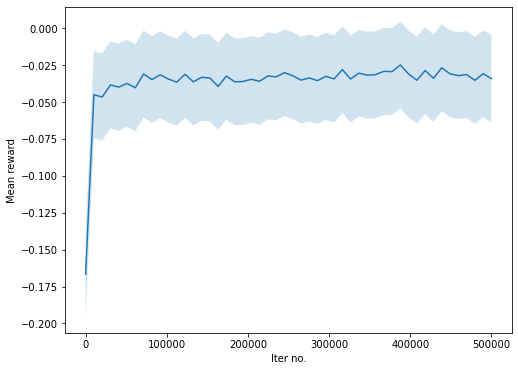

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0, n_learning_steps, len(mean_rewards)), mean_rewards)
plt.fill_between(np.linspace(0, n_learning_steps, len(mean_rewards)),
                 np.array(mean_rewards) - 0.03 * np.array(std_rewards), 
                 np.array(mean_rewards) + 0.03 * np.array(std_rewards), alpha=0.2)
plt.xlabel('Iter no.')
plt.ylabel('Mean reward');

Судя по графику, модель относительно достойно обучилась уже на 100 000 итерации, дальнейшее обучение едва улучшает ее качество. Так же дисперсия очень слабо, еле заметно, но все же падает по мере обучения (сильнее всего она падает по сравнению с первыми итерациями)

# Часть 2. Удвоение

## Пункт 4. Реализуем удвоение в среде

In [17]:
import gym
from gym import spaces
from gym.utils import seeding


def cmp(a, b):
    return float(a > b) - float(a < b)


# 1 = Ace, 2-10 = Number cards, Jack/Queen/King = 10
deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]


def draw_card(np_random):
    return int(np_random.choice(deck))


def draw_hand(np_random):
    return [draw_card(np_random), draw_card(np_random)]


def usable_ace(hand):  # Does this hand have a usable ace?
    return 1 in hand and sum(hand) + 10 <= 21


def sum_hand(hand):  # Return current hand total
    if usable_ace(hand):
        return sum(hand) + 10
    return sum(hand)


def is_bust(hand):  # Is this hand a bust?
    return sum_hand(hand) > 21


def score(hand):  # What is the score of this hand (0 if bust)
    return 0 if is_bust(hand) else sum_hand(hand)


def is_natural(hand):  # Is this hand a natural blackjack?
    return sorted(hand) == [1, 10]


class BlackjackEnvDouble(gym.Env):
    """Simple blackjack environment
    Blackjack is a card game where the goal is to obtain cards that sum to as
    near as possible to 21 without going over.  They're playing against a fixed
    dealer.
    Face cards (Jack, Queen, King) have point value 10.
    Aces can either count as 11 or 1, and it's called 'usable' at 11.
    This game is placed with an infinite deck (or with replacement).
    The game starts with dealer having one face up and one face down card, while
    player having two face up cards. (Virtually for all Blackjack games today).
    The player can request additional cards (hit=1) until they decide to stop
    (stick=0) or exceed 21 (bust).
    After the player sticks, the dealer reveals their facedown card, and draws
    until their sum is 17 or greater.  If the dealer goes bust the player wins.
    If neither player nor dealer busts, the outcome (win, lose, draw) is
    decided by whose sum is closer to 21.  The reward for winning is +1,
    drawing is 0, and losing is -1.
    The observation of a 3-tuple of: the players current sum,
    the dealer's one showing card (1-10 where 1 is ace),
    and whether or not the player holds a usable ace (0 or 1).
    This environment corresponds to the version of the blackjack problem
    described in Example 5.1 in Reinforcement Learning: An Introduction
    by Sutton and Barto.
    http://incompleteideas.net/book/the-book-2nd.html
    """

    def __init__(self, natural=False, sab=False):
        self.action_space = spaces.Discrete(3) # 2 -> 3
        self.observation_space = spaces.Tuple(
            (spaces.Discrete(32), spaces.Discrete(11), spaces.Discrete(2))
        )
        self.seed()

        # Flag to payout 1.5 on a "natural" blackjack win, like casino rules
        # Ref: http://www.bicyclecards.com/how-to-play/blackjack/
        self.natural = natural

        # Flag for full agreement with the (Sutton and Barto, 2018) definition. Overrides self.natural
        self.sab = sab

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, action):
        assert self.action_space.contains(action)
        if action == 1:  # hit: add a card to players hand and return
            self.player.append(draw_card(self.np_random))
            if is_bust(self.player):
                done = True
                reward = -1.0
            else:
                done = False
                reward = 0.0
        elif action == 2: # Добавляем функциональность для double
            self.player.append(draw_card(self.np_random))
            done = True
            if is_bust(self.player):
                reward = -2.0
            else:
                while sum_hand(self.dealer) < 17:
                    self.dealer.append(draw_card(self.np_random))
                reward = 2 * cmp(score(self.player), score(self.dealer))
        else:  # stick: play out the dealers hand, and score
            done = True
            while sum_hand(self.dealer) < 17:
                self.dealer.append(draw_card(self.np_random))
            reward = cmp(score(self.player), score(self.dealer))
            if self.sab and is_natural(self.player) and not is_natural(self.dealer):
                # Player automatically wins. Rules consistent with S&B
                reward = 1.0
            elif (
                not self.sab
                and self.natural
                and is_natural(self.player)
                and reward == 1.0
            ):
                # Natural gives extra points, but doesn't autowin. Legacy implementation
                reward = 1.5
        return self._get_obs(), reward, done, {}

    def _get_obs(self):
        return (sum_hand(self.player), self.dealer[0], usable_ace(self.player))

    def reset(self):
        self.dealer = draw_hand(self.np_random)
        self.player = draw_hand(self.np_random)
        return self._get_obs()

## Пункт 5. Вновь тренируем, но уже в среде с Double

In [18]:
def epsilon_greedy_policy_double(Q, state, epsilon):
    if random.random() < epsilon:
        return random.choice([0, 1, 2])
    else:
        return np.argmax(Q[state[0], state[1], int(state[2])])


def run_experiment_double(learning_rate, gamma, epsilon, n_learning_steps=int(2.5e5), n_playing_steps=int(1e5)):
    env = BlackjackEnvDouble(natural=True)
    rewards = []
    Q = np.zeros((32, 11, 2, 3))
    for _ in tqdm_notebook(range(n_learning_steps)):
        player_hand_sum, dealer_card, usable_ace_flag = env.reset()
        done = False_
        while not done:
            next_action = epsilon_greedy_policy_double(Q, (player_hand_sum, dealer_card, usable_ace_flag), epsilon)
            new_state, reward, done, _ = env.step(next_action)
            td_target = reward + gamma * np.max(Q[new_state[0], new_state[1], int(new_state[2])], axis=0)
            td_error = td_target - Q[player_hand_sum, dealer_card, int(usable_ace_flag), next_action]
            Q[player_hand_sum, dealer_card, int(usable_ace_flag), next_action] += learning_rate * td_error
            player_hand_sum, dealer_card, usable_ace_flag = new_state
    for _ in tqdm_notebook(range(n_playing_steps)):
        player_hand_sum, dealer_card, usable_ace_flag = env.reset()
        done = False
        while not done:
            next_action = np.argmax(Q[player_hand_sum, dealer_card, int(usable_ace_flag)])
            (player_hand_sum, dealer_card, usable_ace_flag), reward, done, _ = env.step(next_action)
        rewards.append(reward)
    return np.mean(rewards), Q

In [30]:
best_triad = None
best_Q = None
best_reward = -100
for epsilon in tqdm_notebook([0.3, 0.5, 0.7, 0.9]):
    for gamma in tqdm_notebook([0.9, 0.95, 1.0]):
        for learning_rate in tqdm_notebook([1e-2, 1e-3, 1e-4, 1e-5]):
            reward, Q = run_experiment_double(learning_rate, gamma, epsilon)
            if reward > best_reward:
                best_reward = reward
                best_triad = (learning_rate, gamma, epsilon)
                best_Q = Q
                print(f'{reward}: lr {learning_rate}, gamma {gamma}, epsilon {epsilon}')

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

-0.112725: lr 0.01, gamma 0.9, epsilon 0.3


  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

-0.06552: lr 0.001, gamma 0.9, epsilon 0.3


  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

-0.064: lr 0.0001, gamma 0.9, epsilon 0.5


  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

-0.046515: lr 0.0001, gamma 0.95, epsilon 0.5


  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

-0.042095: lr 1e-05, gamma 1.0, epsilon 0.5


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

-0.04126: lr 0.0001, gamma 0.9, epsilon 0.7


  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

-0.034915: lr 1e-05, gamma 0.9, epsilon 0.7


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

-0.029255: lr 0.0001, gamma 0.95, epsilon 0.7


  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

-0.028525: lr 0.0001, gamma 1.0, epsilon 0.7


  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

-0.027745: lr 1e-05, gamma 1.0, epsilon 0.7


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

-0.016025: lr 0.0001, gamma 0.9, epsilon 0.9


  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

-0.012855: lr 0.0001, gamma 1.0, epsilon 0.9


  0%|          | 0/250000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

In [31]:
print(f'best learning rate {best_triad[0]}\nbest gamma {best_triad[1]}\nbest epsilon {best_triad[2]}')

best learning rate 0.0001
best gamma 1.0
best epsilon 0.9


Лучшая средняя награда **-0.012855**, это уже намного лучше, чем результат предыдущей модели.

In [19]:
def make_data_for_plots_double():
    learning_rate, gamma, epsilon = 0.0001, 1, 0.9
    env = BlackjackEnvDouble(natural=True)
    n_learning_steps = int(5e5)
    n_playing_steps = int(2e5)
    mean_rewards = []
    std_rewards = []
    Q = np.zeros((32, 11, 2, 3))
    for i in tqdm_notebook(range(n_learning_steps)):
        player_hand_sum, dealer_card, usable_ace_flag = env.reset()
        done = False
        while not done:
            next_action = epsilon_greedy_policy_double(Q, (player_hand_sum, dealer_card, usable_ace_flag), epsilon)
            new_state, reward, done, _ = env.step(next_action)
            td_target = reward + gamma * np.max(Q[new_state[0], new_state[1], int(new_state[2])], axis=0)
            td_error = td_target - Q[player_hand_sum, dealer_card, int(usable_ace_flag), next_action]
            Q[player_hand_sum, dealer_card, int(usable_ace_flag), next_action] += learning_rate * td_error
            player_hand_sum, dealer_card, usable_ace_flag = new_state
        if i % 10000 == 0:
            rewards = []
            for _ in tqdm_notebook(range(n_playing_steps)):
                player_hand_sum, dealer_card, usable_ace_flag = env.reset()
                done = False
                while not done:
                    next_action = np.argmax(Q[player_hand_sum, dealer_card, int(usable_ace_flag)])
                    (player_hand_sum, dealer_card, usable_ace_flag), reward, done, _ = env.step(next_action)
                rewards.append(reward)
            mean_rewards.append(np.mean(rewards))
            std_rewards.append(np.std(rewards))
    return mean_rewards, std_rewards

In [20]:
mean_rewards, std_rewards = make_data_for_plots_double()

  0%|          | 0/500000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

In [21]:
with open('mean_rewards_double.pickle', 'wb') as fin:
    pickle.dump(mean_rewards, fin)
    
with open('std_rewards_double.pickle', 'wb') as fin:
    pickle.dump(std_rewards, fin)

In [23]:
with open('mean_rewards.pickle', 'rb') as fin:
    mean_rewards_first = pickle.load(fin)

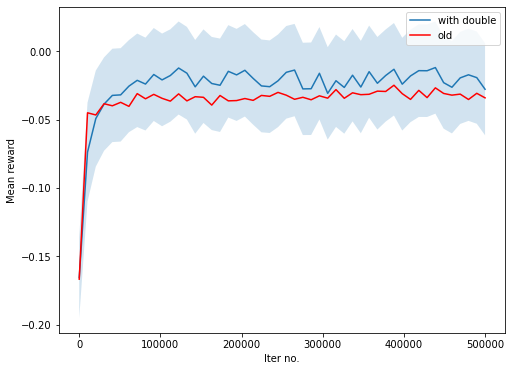

In [25]:
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0, n_learning_steps, len(mean_rewards)), mean_rewards, label='with double')
plt.fill_between(np.linspace(0, n_learning_steps, len(mean_rewards)),
                 np.array(mean_rewards) - 0.03 * np.array(std_rewards), 
                 np.array(mean_rewards) + 0.03 * np.array(std_rewards), alpha=0.2)
plt.plot(np.linspace(0, n_learning_steps, len(mean_rewards)), mean_rewards_first, color='red', label='old')
plt.xlabel('Iter no.')
plt.ylabel('Mean reward')
plt.legend();

# Часть 3. С Дастином Хоффманом (считаем карты)

## Пункт 7. Видоизменяем окружение

Перед началом, надо посчитать, сколько бывает уникальных состояний колоды.  
Количество уникальных конфигураций колоды длинной от 15 до 52 карт достаточно велико, и это количество будет крайне затруднительно выучить.  
В качестве "подсчета" карт попробуем использовать сумму оставшихся в колоде карт. Очевидно, что при таком подходе достаточно велика вероятность коллизии, однако очень уж интересно протестировать такой подход к задаче. Тем более, что количество таких состояний будет около 300, что усложнит решение задачи Q-обучения, но не настолько, что результаты увидят внуки :)

In [2]:
deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]
real_deck = [[each] * 4 for each in deck]
real_deck = [item for sublist in real_deck for item in sublist]

In [3]:
min_sum = sum(real_deck[:10]) # остались лишь 1, 1, 1, 1, 2, 2, 2, 2, ... оставляем 10 карт в колоде, чтобы на случай, если колода закончилась, игра не прерывалась
max_sum = sum(real_deck)

In [6]:
import gym
from gym import spaces
from gym.utils import seeding


def cmp(a, b):
    return float(a > b) - float(a < b)


# 1 = Ace, 2-10 = Number cards, Jack/Queen/King = 10
deck = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]


def usable_ace(hand):  # Does this hand have a usable ace?
    return 1 in hand and sum(hand) + 10 <= 21


def sum_hand(hand):  # Return current hand total
    if usable_ace(hand):
        return sum(hand) + 10
    return sum(hand)


def is_bust(hand):  # Is this hand a bust?
    return sum_hand(hand) > 21


def score(hand):  # What is the score of this hand (0 if bust)
    return 0 if is_bust(hand) else sum_hand(hand)


def is_natural(hand):  # Is this hand a natural blackjack?
    return sorted(hand) == [1, 10]


class BlackjackEnvDoubleCount(gym.Env):
    """Simple blackjack environment
    Blackjack is a card game where the goal is to obtain cards that sum to as
    near as possible to 21 without going over.  They're playing against a fixed
    dealer.
    Face cards (Jack, Queen, King) have point value 10.
    Aces can either count as 11 or 1, and it's called 'usable' at 11.
    This game is placed with an infinite deck (or with replacement).
    The game starts with dealer having one face up and one face down card, while
    player having two face up cards. (Virtually for all Blackjack games today).
    The player can request additional cards (hit=1) until they decide to stop
    (stick=0) or exceed 21 (bust).
    After the player sticks, the dealer reveals their facedown card, and draws
    until their sum is 17 or greater.  If the dealer goes bust the player wins.
    If neither player nor dealer busts, the outcome (win, lose, draw) is
    decided by whose sum is closer to 21.  The reward for winning is +1,
    drawing is 0, and losing is -1.
    The observation of a 3-tuple of: the players current sum,
    the dealer's one showing card (1-10 where 1 is ace),
    and whether or not the player holds a usable ace (0 or 1).
    This environment corresponds to the version of the blackjack problem
    described in Example 5.1 in Reinforcement Learning: An Introduction
    by Sutton and Barto.
    http://incompleteideas.net/book/the-book-2nd.html
    """

    def __init__(self, natural=False, sab=False):
        self.action_space = spaces.Discrete(3) # 2 -> 3
        self.observation_space = spaces.Tuple(
            (spaces.Discrete(32), spaces.Discrete(11), spaces.Discrete(2), spaces.Discrete(max_sum - min_sum))
        )
        self.seed()

        # Flag to payout 1.5 on a "natural" blackjack win, like casino rules
        # Ref: http://www.bicyclecards.com/how-to-play/blackjack/
        self.natural = natural

        # Flag for full agreement with the (Sutton and Barto, 2018) definition. Overrides self.natural
        self.sab = sab
        self.deck = [each for each in real_deck]
        self.need_new_deck = False

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]
    
    def draw_card(self):
        if len(self.deck) < 15:
            self.need_new_deck = True
        output_card = self.deck.pop(random.randrange(len(self.deck)))
        return int(output_card)
    
    def draw_hand(self):
        return [self.draw_card(), self.draw_card()]

    def step(self, action):
        assert self.action_space.contains(action)
        if action == 1:  # hit: add a card to players hand and return
            self.player.append(self.draw_card())
            if is_bust(self.player):
                done = True
                reward = -1.0
            else:
                done = False
                reward = 0.0
        elif action == 2: # Добавляем функциональность для double
            self.player.append(self.draw_card())
            done = True
            if is_bust(self.player):
                reward = -2.0
            else:
                while sum_hand(self.dealer) < 17:
                    self.dealer.append(self.draw_card())
                reward = 2 * cmp(score(self.player), score(self.dealer))
        else:  # stick: play out the dealers hand, and score
            done = True
            while sum_hand(self.dealer) < 17:
                self.dealer.append(self.draw_card())
            reward = cmp(score(self.player), score(self.dealer))
            if self.sab and is_natural(self.player) and not is_natural(self.dealer):
                # Player automatically wins. Rules consistent with S&B
                reward = 1.0
            elif (
                not self.sab
                and self.natural
                and is_natural(self.player)
                and reward == 1.0
            ):
                # Natural gives extra points, but doesn't autowin. Legacy implementation
                reward = 1.5
        return self._get_obs(), reward, done, {}

    def _get_obs(self):
        return (sum_hand(self.player), self.dealer[0], usable_ace(self.player), sum(self.deck) - min_sum)

    def reset(self):
        self.dealer = self.draw_hand()
        self.player = self.draw_hand()
        return self._get_obs()

In [5]:
def epsilon_greedy_policy_double_count(Q, state, epsilon):
    if random.random() < epsilon:
        return random.choice([0, 1, 2])
    else:
        return np.argmax(Q[state[0], state[1], int(state[2]), int(state[3])])


def run_experiment_double_count(learning_rate, gamma, epsilon, n_learning_steps=int(2.5e5), n_playing_steps=int(1e5)):
    env = BlackjackEnvDoubleCount(natural=True)
    rewards = []
    Q = np.zeros((32, 11, 2, max_sum - min_sum + 1, 3))
    for _ in tqdm_notebook(range(n_learning_steps)):
        player_hand_sum, dealer_card, usable_ace_flag, deck_sum = env.reset()
        done = False
        while not done:
            next_action = epsilon_greedy_policy_double_count(Q, (player_hand_sum, dealer_card, usable_ace_flag, deck_sum), epsilon)
            new_state, reward, done, _ = env.step(next_action)
            td_target = reward + gamma * np.max(Q[new_state[0], new_state[1], int(new_state[2]), int(new_state[3])], axis=0)
            td_error = td_target - Q[player_hand_sum, dealer_card, int(usable_ace_flag), deck_sum, next_action]
            Q[player_hand_sum, dealer_card, int(usable_ace_flag), deck_sum, next_action] += learning_rate * td_error
            player_hand_sum, dealer_card, usable_ace_flag, deck_sum = new_state
        if env.need_new_deck:
            env.need_new_deck = False
            env.deck = [each for each in real_deck]
    for _ in tqdm_notebook(range(n_playing_steps)):
        player_hand_sum, dealer_card, usable_ace_flag, deck_sum = env.reset()
        done = False
        while not done:
            next_action = np.argmax(Q[player_hand_sum, dealer_card, int(usable_ace_flag), deck_sum])
            (player_hand_sum, dealer_card, usable_ace_flag, deck_sum), reward, done, _ = env.step(next_action)
        if env.need_new_deck:
            env.need_new_deck = False
            env.deck = [each for each in real_deck]
        rewards.append(reward)
    return np.mean(rewards), Q

In [91]:
best_triad = None
best_Q = None
best_reward = -100
for epsilon in tqdm_notebook([0.3, 0.5, 0.7, 0.9]):
    for gamma in tqdm_notebook([0.3, 0.9, 0.95, 1.0]):
        for learning_rate in tqdm_notebook([1e-3, 1e-4, 1e-5, 1e-6]):
            reward, Q = run_experiment_double_count(learning_rate, gamma, epsilon, n_learning_steps=int(1e6), n_playing_steps=int(2e5))
            if reward > best_reward:
                best_reward = reward
                best_triad = (learning_rate, gamma, epsilon)
                best_Q = Q
                print(f'{reward}: lr {learning_rate}, gamma {gamma}, epsilon {epsilon}')

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

-0.1005325: lr 0.001, gamma 0.3, epsilon 0.3


  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

-0.0944825: lr 0.001, gamma 0.3, epsilon 0.5


  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

-0.0937475: lr 0.0001, gamma 0.3, epsilon 0.5


  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

-0.0899375: lr 1e-05, gamma 0.3, epsilon 0.5


  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

-0.0858475: lr 0.001, gamma 0.9, epsilon 0.5


  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

-0.0841: lr 1e-05, gamma 0.3, epsilon 0.7


  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

-0.0817075: lr 1e-06, gamma 0.9, epsilon 0.7


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

-0.0800125: lr 1e-05, gamma 0.3, epsilon 0.9


  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

-0.0791875: lr 0.001, gamma 0.9, epsilon 0.9


  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

Из-за того, что состояний очень много, попробуем сначала обучить 1 млн. итераций, выберем лучшие гиперпараметры, а потом с лучшими попробуем обучить на большем количестве итераций (пару десятков млн. должно хватить)

In [92]:
print(f'best learning rate {best_triad[0]}\nbest gamma {best_triad[1]}\nbest epsilon {best_triad[2]}')

best learning rate 0.001
best gamma 0.9
best epsilon 0.9


In [25]:
def make_data_for_plots_double_count(n_learning_steps):
    learning_rate, gamma, epsilon = 0.001, 0.9, 0.9
    env = BlackjackEnvDoubleCount(natural=True)
    n_learning_steps = n_learning_steps or int(1e7)
    n_playing_steps = int(2e5)
    play_freq = n_learning_steps // 100
    mean_rewards = []
    std_rewards = []
    Q = np.zeros((32, 11, 2, max_sum - min_sum + 1, 3))
    for i in tqdm_notebook(range(n_learning_steps)):
        player_hand_sum, dealer_card, usable_ace_flag, deck_sum = env.reset()
        done = False
        while not done:
            next_action = epsilon_greedy_policy_double_count(Q, (player_hand_sum, dealer_card, usable_ace_flag, deck_sum), epsilon)
            new_state, reward, done, _ = env.step(next_action)
            td_target = reward + gamma * np.max(Q[new_state[0], new_state[1], int(new_state[2]), int(new_state[3])], axis=0)
            td_error = td_target - Q[player_hand_sum, dealer_card, int(usable_ace_flag), deck_sum, next_action]
            Q[player_hand_sum, dealer_card, int(usable_ace_flag), deck_sum, next_action] += learning_rate * td_error
            player_hand_sum, dealer_card, usable_ace_flag, deck_sum = new_state
        if env.need_new_deck:
            env.need_new_deck = False
            env.deck = [each for each in real_deck]
        if i % play_freq == 0:
            rewards = []
            for _ in tqdm_notebook(range(n_playing_steps)):
                player_hand_sum, dealer_card, usable_ace_flag, deck_sum = env.reset()
                done = False
                while not done:
                    next_action = np.argmax(Q[player_hand_sum, dealer_card, int(usable_ace_flag), deck_sum])
                    (player_hand_sum, dealer_card, usable_ace_flag, deck_sum), reward, done, _ = env.step(next_action)
                if env.need_new_deck:
                    env.need_new_deck = False
                    env.deck = [each for each in real_deck]
                rewards.append(reward)
            mean_rewards.append(np.mean(rewards))
            std_rewards.append(np.std(rewards))
    return mean_rewards, std_rewards

In [16]:
mean_rewards, std_rewards = make_data_for_plots_double_count()

  0%|          | 0/10000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

In [17]:
with open('mean_rewards_double_count.pickle', 'wb') as fin:
    pickle.dump(mean_rewards, fin)
    
with open('std_rewards_double_count.pickle', 'wb') as fin:
    pickle.dump(std_rewards, fin)

In [19]:
with open('mean_rewards_double.pickle', 'rb') as fin:
    mean_rewards_double = pickle.load(fin)
    
with open('mean_rewards.pickle', 'rb') as fin:
    mean_rewards_common = pickle.load(fin)

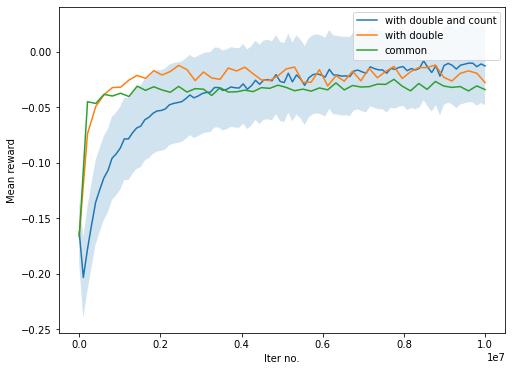

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0, int(1e7), len(mean_rewards)), mean_rewards, label='with double and count')
plt.fill_between(np.linspace(0, int(1e7), len(mean_rewards)),
                 np.array(mean_rewards) - 0.03 * np.array(std_rewards), 
                 np.array(mean_rewards) + 0.03 * np.array(std_rewards), alpha=0.2)
plt.plot(np.linspace(0, int(1e7), len(mean_rewards_double)), mean_rewards_double, label='with double')
plt.plot(np.linspace(0, int(1e7), len(mean_rewards_common)), mean_rewards_common, label='common')
plt.xlabel('Iter no.')
plt.ylabel('Mean reward')
plt.legend();

Алгоритм с подсчетом начинает показывать лучший результат после 10 млн. итераций обучения, пустимся во все тяжкие и увеличим до 50 млн.  
PS масштаб по оси Х разный: предыдущие алгоритмы обучались за 0.5 млн итераций и выходили в "насыщение", новая модель обучается 10 млн.

In [26]:
mean_rewards, std_rewards = make_data_for_plots_double_count(int(5e7))

  0%|          | 0/50000000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

  0%|          | 0/200000 [00:00<?, ?it/s]

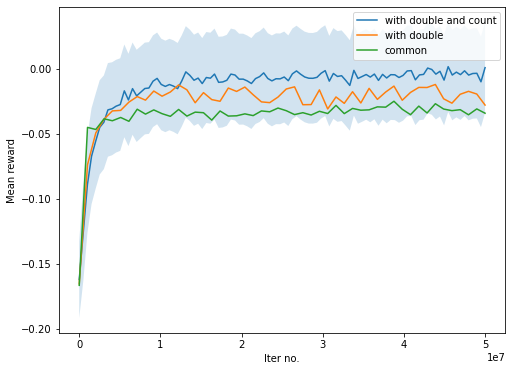

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0, int(5e7), len(mean_rewards)), mean_rewards, label='with double and count')
plt.fill_between(np.linspace(0, int(5e7), len(mean_rewards)),
                 np.array(mean_rewards) - 0.03 * np.array(std_rewards), 
                 np.array(mean_rewards) + 0.03 * np.array(std_rewards), alpha=0.2)
plt.plot(np.linspace(0, int(5e7), len(mean_rewards_double)), mean_rewards_double, label='with double')
plt.plot(np.linspace(0, int(5e7), len(mean_rewards_common)), mean_rewards_common, label='common')
plt.xlabel('Iter no.')
plt.ylabel('Mean reward')
plt.legend();

Масштаб опять с подвохом. Корректна ось Х лишь для синей линии, остальные пришлось "натянуть" вперед для наглядности превосходства модели с подсчетом.

In [37]:
(np.array(mean_rewards) > 0).sum()

3

Подсчет карт на 50 млн. итерациях показал даже ПОЛОЖИТЕЛЬНЫЙ выигрыш в 3 случаях из 100, измерялся средний выигрыш на 200_000 играх. Этот результат значительно лучше всех моделей, которые были обучены раннее, как можно видеть по графике.   
Можно считать это небольшой победой над казино, однако, как правило, казино по классике остается в выигрыше :(

![](https://memepedia.ru/wp-content/uploads/2018/03/ebanyy-rot-etogo-kazino.png)

In [29]:
with open('mean_rewards_double_count_50mln.pickle', 'wb') as fin:
    pickle.dump(mean_rewards, fin)
    
with open('std_rewards_double_count_50mln.pickle', 'wb') as fin:
    pickle.dump(std_rewards, fin)

In [28]:
print(mean_rewards[-1])

0.00093


In [30]:
print(np.max(mean_rewards))

0.00168


# Выводы  
* Последняя стратегия с возможностью double и подсчета карт является самой лучшей с точки зрения среднего выигрыша. Кроме того, она обучается намного дольше из-за увеличенной размерности пространства состояний S.
* Для всех моделей лучшее значение epsilon достаточно велико, как и значение gamma. Learning rate чем ниже, тем лучше.
* Казино обыграть все еще не удалось  

ДЗ очень крутое, спасибо!